In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from helper_functions import plot_subgroup_hist

In [26]:
path = '../data/conditions_df.csv'
fire_df = pd.read_csv(path)
print(f'Dataframe size:\n{fire_df.shape[0]} entries and {fire_df.shape[1]} columns')
fire_df.head()

Dataframe size:
149572 entries and 20 columns


,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Notes,Target
0,2,FivePoints,San Joaquin Valley,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,NaN,0
1,2,FivePoints,San Joaquin Valley,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,NaN,0
2,2,FivePoints,San Joaquin Valley,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,NaN,0
3,2,FivePoints,San Joaquin Valley,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,NaN,0
4,2,FivePoints,San Joaquin Valley,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,NaN,0


In [3]:
# Class imbalance
fire_df.Target.value_counts() / len(fire_df)

0    0.966658
1    0.033342
Name: Target, dtype: float64

In [4]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149572 entries, 0 to 149571
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Stn Id                149572 non-null  int64  
 1   Stn Name              149572 non-null  object 
 2   CIMIS Region          149572 non-null  object 
 3   Date                  149572 non-null  object 
 4   ETo (in)              136902 non-null  float64
 5   Precip (in)           146386 non-null  float64
 6   Sol Rad (Ly/day)      146604 non-null  float64
 7   Avg Vap Pres (mBars)  146124 non-null  float64
 8   Max Air Temp (F)      145320 non-null  float64
 9   Min Air Temp (F)      146120 non-null  float64
 10  Avg Air Temp (F)      146065 non-null  float64
 11  Max Rel Hum (%)       146420 non-null  float64
 12  Min Rel Hum (%)       146420 non-null  float64
 13  Avg Rel Hum (%)       143108 non-null  float64
 14  Dew Point (F)         143108 non-null  float64
 15  

In [5]:
fire_df.describe()

,Stn Id,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target
count,149572.000000,136902.000000,146386.000000,146604.000000,146124.000000,145320.000000,146120.000000,146065.000000,146420.000000,146420.000000,143108.000000,143108.000000,146362.000000,146360.000000,143277.000000,149572.000000
mean,158.800237,0.159246,0.037381,461.167785,11.233378,75.454929,48.621945,61.395490,84.191005,39.587433,60.884612,45.675383,4.264824,105.286427,62.906942,0.033342
std,70.450152,0.087495,0.202662,197.950205,4.300339,14.944554,11.606471,12.631985,17.526924,20.944565,20.620457,11.103064,46.836148,51.681023,10.942617,0.179528
min,2.000000,0.000000,0.000000,-27.000000,0.000000,24.900000,-5.000000,13.000000,0.000000,0.000000,0.000000,-74.300000,-17894.900000,0.000000,31.500000,0.000000
25%,105.000000,0.080000,0.000000,303.000000,8.300000,64.100000,41.100000,52.800000,77.000000,23.000000,45.000000,39.600000,3.000000,71.900000,54.400000,0.000000
50%,171.000000,0.160000,0.000000,476.000000,11.200000,74.300000,48.900000,60.200000,91.000000,36.000000,63.000000,47.400000,3.900000,93.200000,62.900000,0.000000
75%,219.000000,0.230000,0.000000,635.000000,14.000000,86.300000,56.000000,69.500000,97.000000,55.000000,78.000000,53.500000,5.200000,124.500000,71.000000,0.000000
max,262.000000,0.510000,13.610000,6618.000000,49.100000,123.700000,93.400000,107.600000,100.000000,100.000000,100.000000,82.200000,46.900000,1125.300000,102.500000,1.000000


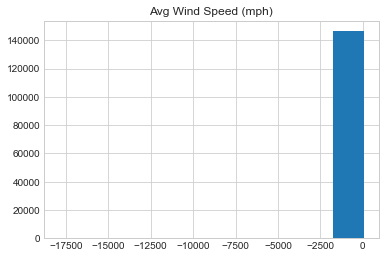

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Notes,Target
73373,155,Bryte (experimental),Sacramento Valley,5/21/2019,NaN,0.01,779.0,11.5,67.7,52.1,60.9,90.0,52.0,63.0,48.2,-17894.9,NaN,68.1,NaN,0


In [6]:
fire_df.hist('Avg Wind Speed (mph)')
plt.show();

fire_df[fire_df['Avg Wind Speed (mph)'] < 0]

In [27]:
# Removing experimental outlier
fire_df = fire_df[fire_df['Avg Wind Speed (mph)'] > 0]

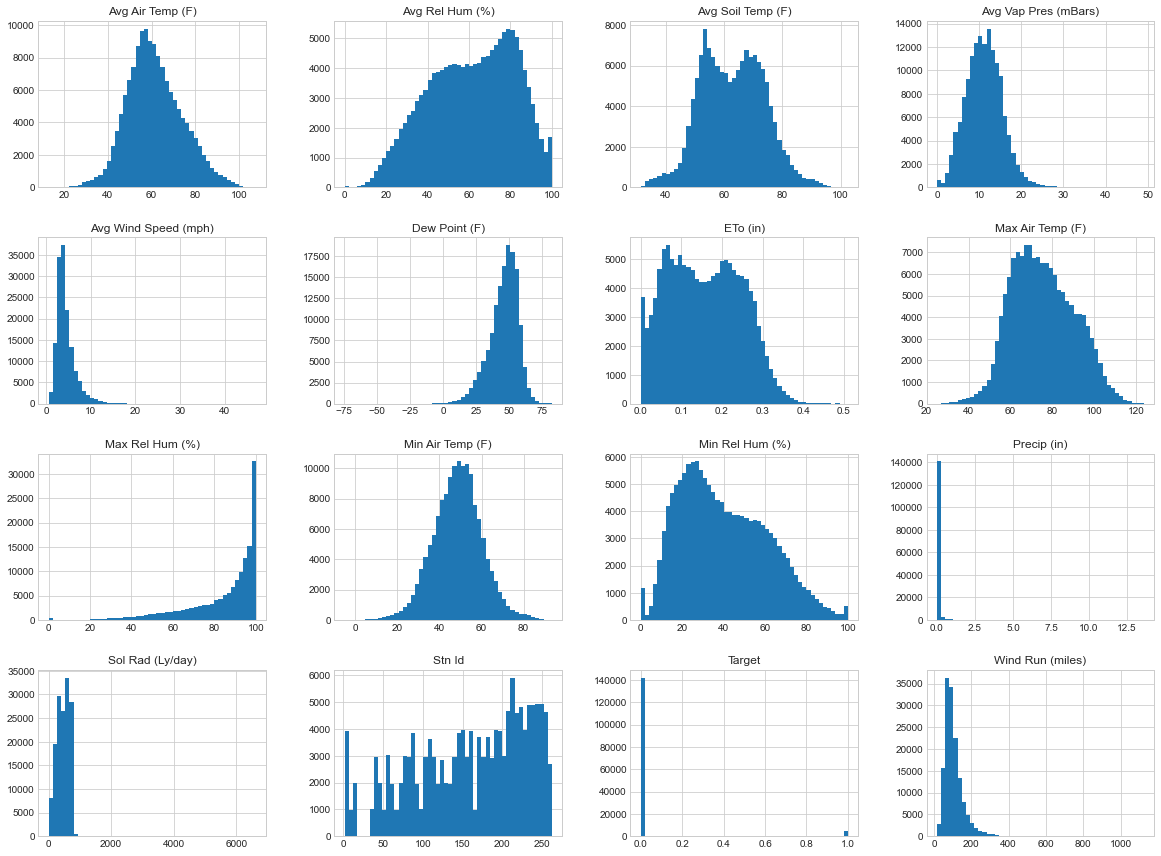

In [8]:
fire_df.hist(bins=50, figsize=(20,15));

Observations:
* Removed outlier in `Avg Wind Speed (mph)`
* Do not need max or min columns
* Needs to be scaled
* Some are tail-heavy: need to apply a transformation to get bell shaped curves

In [9]:
# Dropping max/min values
df = fire_df.copy()

to_drop = ['Max Air Temp (F)', 'Max Rel Hum (%)', 'Min Air Temp (F)',
           'Min Rel Hum (%)']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Notes,Target
0,2,FivePoints,San Joaquin Valley,1/1/2018,0.06,0.00,219.0,7.3,47.8,65.0,36.6,3.3,78.3,51.1,NaN,0
1,2,FivePoints,San Joaquin Valley,1/2/2018,0.04,0.00,127.0,7.4,47.2,67.0,36.7,3.1,74.5,51.3,NaN,0
2,2,FivePoints,San Joaquin Valley,1/3/2018,0.04,0.00,125.0,8.4,49.9,68.0,39.9,4.5,107.5,51.3,NaN,0
3,2,FivePoints,San Joaquin Valley,1/4/2018,0.07,0.01,219.0,11.6,56.8,74.0,48.5,5.8,140.2,53.0,NaN,0
4,2,FivePoints,San Joaquin Valley,1/5/2018,0.07,0.00,239.0,12.7,59.8,72.0,50.8,4.2,101.4,54.4,NaN,0


In [10]:
df['CIMIS Region'].value_counts()

San Joaquin Valley              26308
Monterey Bay                    13927
Sacramento Valley               13800
Los Angeles Basin               13477
Central Coast Valleys           12698
San Francisco Bay               12649
South Coast Valleys             12511
Imperial/Coachella Valley       11154
North Coast Valleys              6974
Northeast Plateau                6681
San Bernardino                   6599
Sierra Foothill                  4904
Bishop                           3701
Eastern Sierra Basin & Range      973
Name: CIMIS Region, dtype: int64

In [11]:
df['Stn Name'].value_counts()

Lindcove          1133
Buntingville      1040
Santa Monica      1033
Long Beach        1026
Santa Clarita     1026
                  ... 
Arleta             637
Ferndale Plain     406
Gazelle            362
Montague           359
Linden             201
Name: Stn Name, Length: 154, dtype: int64

In [12]:
df['Stn Id'].value_counts()

86     1133
57     1040
99     1033
204    1026
174    1026
       ... 
216     637
259     406
261     362
260     359
262     201
Name: Stn Id, Length: 154, dtype: int64

*Note: it would be useful to keep a `Stn Name` mapping to `CIMIS Region`*

Before doing a train-test split, keep in mind that we want all regions/stations stratified.

In [13]:
name_region_map = {}

for stn_id, stn_name in zip(np.unique(df['Stn Id']), np.unique(df['Stn Name'])):
    name_region_map[stn_id] = [stn_name, np.unique(df[df['Stn Name']==stn_name]['CIMIS Region'])[0]]

In [14]:
df.drop(['Date', 'Stn Name', 'CIMIS Region', 'Notes'], axis=1, inplace=True)

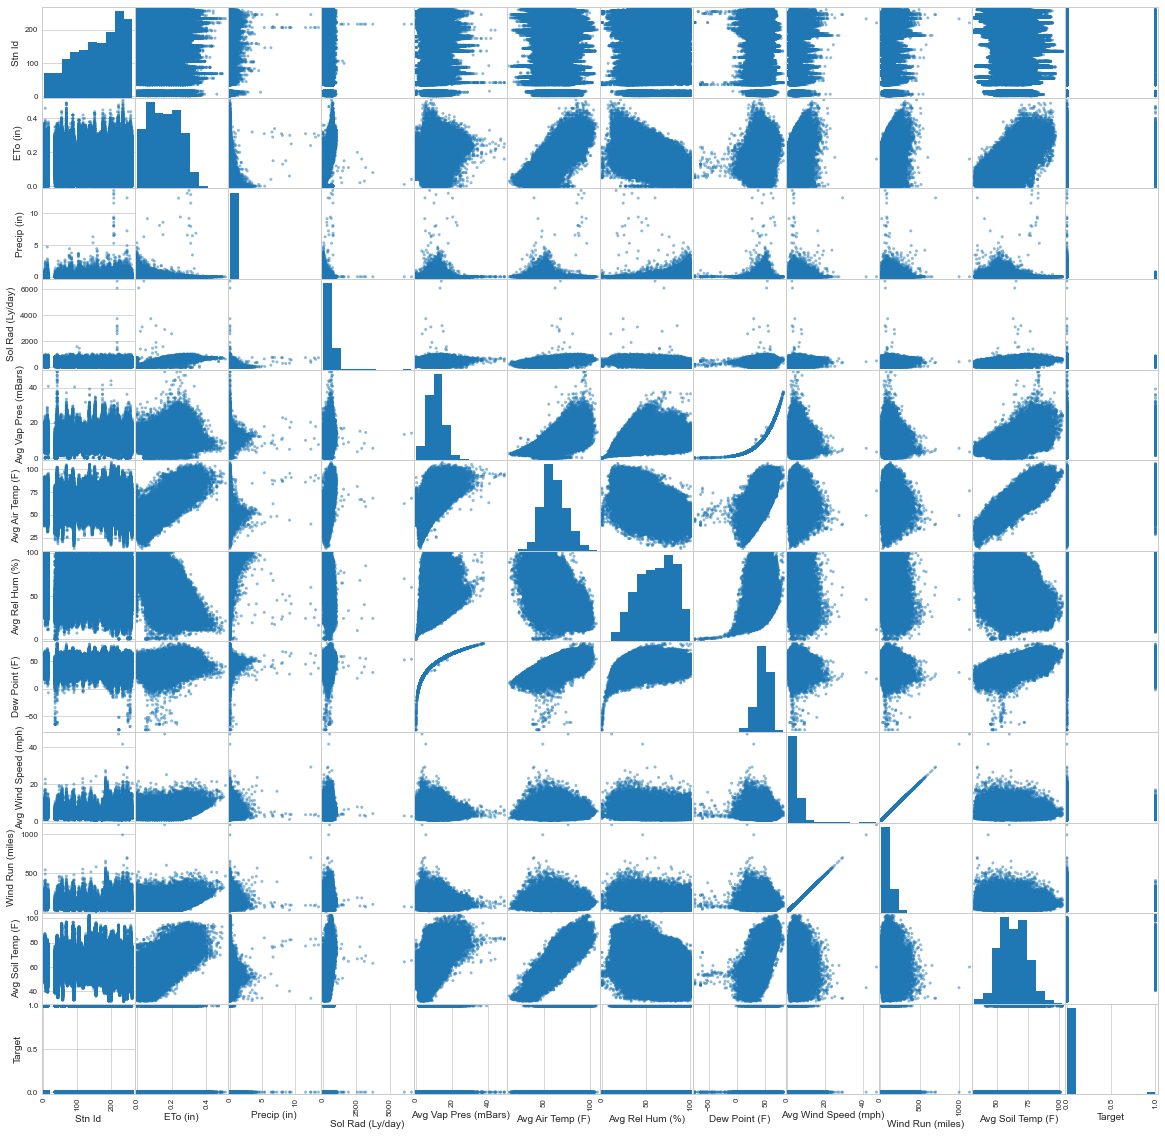

In [15]:
from pandas.plotting import scatter_matrix

numerical_attributes = df._get_numeric_data().columns
scatter_matrix(df[numerical_attributes], figsize=(20,20))
plt.show();

Observations:
* `Avg Air Temp (F)` & `Avg Soil Temp (F)` are redundant
* `Avg Wind Speed (mph)` & `Wind Run (miles)` are redundant

(<Figure size 864x432 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'Stn Id'}>,
         <AxesSubplot:title={'center':'Sol Rad (Ly/day)'}>,
         <AxesSubplot:title={'center':'Avg Rel Hum (%)'}>,
         <AxesSubplot:title={'center':'Wind Run (miles)'}>],
        [<AxesSubplot:title={'center':'ETo (in)'}>,
         <AxesSubplot:title={'center':'Avg Vap Pres (mBars)'}>,
         <AxesSubplot:title={'center':'Dew Point (F)'}>,
         <AxesSubplot:title={'center':'Avg Soil Temp (F)'}>],
        [<AxesSubplot:title={'center':'Precip (in)'}>,
         <AxesSubplot:title={'center':'Avg Air Temp (F)'}>,
         <AxesSubplot:title={'center':'Avg Wind Speed (mph)'}>,
         <AxesSubplot:title={'center':'Target'}>]], dtype=object))

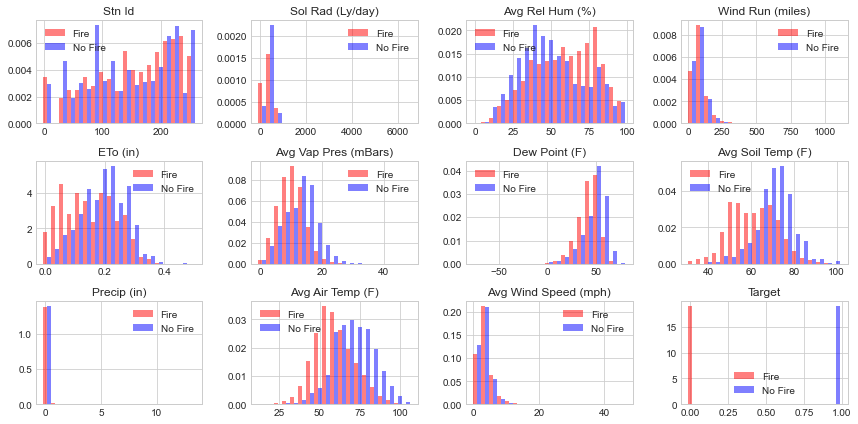

In [16]:
plot_subgroup_hist(df, df[df.Target==0], df[df.Target==1])
#plt.savefig('../images/eda_histograms.png');

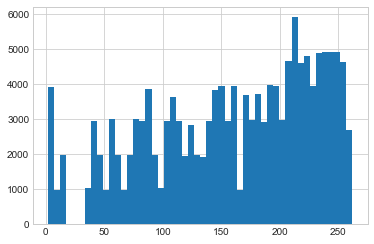

,Overall,Random,Stratified,Random Error,Stratified Error
86,0.007741,0.007892,0.007755,10.058874,0.002733
57,0.007106,0.007721,0.007106,0.720701,-0.301844
99,0.007058,0.007721,0.007072,16.003170,0.104259
204,0.007010,0.007721,0.007003,-1.527921,0.002733
174,0.007010,0.007618,0.007003,-2.373570,0.104259


In [31]:
# Stratifying train-test split
# and testing if it is necessary

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

df = fire_df.copy()
df['Stn Id'].hist(bins=50)
plt.show();

overall = df['Stn Id'].value_counts() / len(df)

X = df.copy()
y = X.pop('Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random = X_test['Stn Id'].value_counts() / len(X_test)
random_error = ((overall - random) / random)*100

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df['Stn Id']):
    strat_train_set = df.iloc[train_idx]
    strat_test_set = df.iloc[test_idx]
    
stratified = strat_test_set['Stn Id'].value_counts() / len(strat_test_set)
stratified_error = ((overall - stratified) / stratified)*100

split_error_df = pd.DataFrame(np.array([overall, random, stratified, random_error, stratified_error]).T, 
             index=overall.index,
             columns=['Overall', 'Random', 'Stratified', 'Random Error', 'Stratified Error'])
split_error_df.head()

In [18]:
print('Random train-test-split error:')
print(round(split_error_df['Random Error'].mean(), 4))
print('Stratified train-test-split error:')
print(round(split_error_df['Stratified Error'].mean(), 4))

Random train-test-split error:
0.5591
Stratified train-test-split error:
0.006


*It's very clear that a stratified split will have a better representation of `Stn Id`s in the data.* Unsure if this will have an effect on model performance.